## 목표: 와인 성분 데이터를 이용해 품질예측모형 개발

## 학습목표
- 처음부터 마지막 단계까지 데이터 분석 실습을 수행하며 일반적인 데이터 분석 과정을 이해한다.
- 데이터 분석 각 단계의 목적 및 필요성을 이해한다.
- 와인 품질에 영향을 미치는 요인을 회귀분석을 통해 도출한다.
- 머신러닝을 활용한 와인 품질 예측 모형을 개발해 본다.

#### 작업환경 설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

# 경고메시지를 무시하고 더이상 안보이게
import warnings
warnings.filterwarnings('ignore')

# 그래프의 사이즈를 고정하고 한글 폰트 설정
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 8
rcParams['font.family'] = 'NanumGothic'

#화면 출력을 조정, 데이터의 양(행과 열의 수)를 조절
pd.set_option('display.max_rows', 30) # 숫자대신 None 이면 제한 없이 모두 보여라
pd.set_option('display.max_columns', 15)

## 1단계: 데이터 준비

In [2]:
red = pd.read_csv('../Data/winequality-red.csv', sep=';')
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white = pd.read_csv('../Data/winequality-white.csv', sep=';')
print(white.shape)
white.head()

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### 여러 데이터를 한꺼번에 불러와서 합치고 정리하기

In [6]:
import glob # 폴더를 제어하는 라이브러리
import os # 디렉토리를 지정/관리하는 패키지

In [7]:
# all_files = glob.glob(os.path.join('../Data/wine*'))
all_files = glob.glob(pathname='../Data/wine*')
print(all_files)

['../Data/winequality-red.csv', '../Data/winequality-white.csv']


In [8]:
all_data = []
for file in all_files:
    data = pd.read_csv(file, sep=';')
    all_data.append(data)


- 여러 개의 데이터 프레임을 하나의 데이터 프레임으로 합치기: concat()

In [9]:
wine = pd.concat(all_data, axis=0, ignore_index=True)
print(wine.shape)
wine.tail()

(6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


- 그런데 white와 red가 데이터상에 구분이 안됨

> **Q. type이라는 coloumn을 추가해서 red=0이라고 기록하고, white=1이라고 기록해서 합치기**

In [10]:
all_data = []
for file in all_files:
    data = pd.read_csv(file, sep=';')
    if 'red' in file:
        data['type'] = 0
    else:
        data['type'] = 1
        
    all_data.append(data)

all_data

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
 0               7.4             0.700         0.00             1.9      0.076  \
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598            6.0             0.310         0.47             3.6      0.067   
 
       free su

In [11]:
wine = pd.concat(all_data, axis=0, ignore_index=True)
print(wine.shape)
wine

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [13]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [14]:
wine.columns = wine.columns.str.replace(' ', '_')

In [15]:
wine.keys()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [16]:
# 특정 column의 value값의 종류 확인 --> unique()
wine.quality.unique()

array([5, 6, 7, 4, 8, 3, 9])

In [17]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

> **Q. 각각의 퀄리티별 와인 수가 몇개일까?

In [18]:
# value_counts() --> 항목별 데이터 샘플 수
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [19]:
# quality가 9등급인 와인의 데이터를 보고 싶다면?
wine[wine.quality == 9]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


In [20]:
wine.loc[wine.quality == 9]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


## 탐색적 분석(EDA)
- 기술적 통계 분석
- 시각화

In [21]:
# groupby() --> 집단 비교 함수, 그룹핑 변수(집단 변수)
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


> **와인 종류에 따라 품질의 분포가 다를까? displot()**
- white의 quality만
- red의 quality만 보기

In [22]:
red = wine.query('type == 0')['quality']
# red = wine.loc[wine.type == 0, 'quality']
red

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [23]:
white = wine.loc[wine.type == 1, 'quality']
white

1599    6
1600    6
1601    6
1602    6
1603    6
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 4898, dtype: int64

<Axes: xlabel='quality', ylabel='Density'>

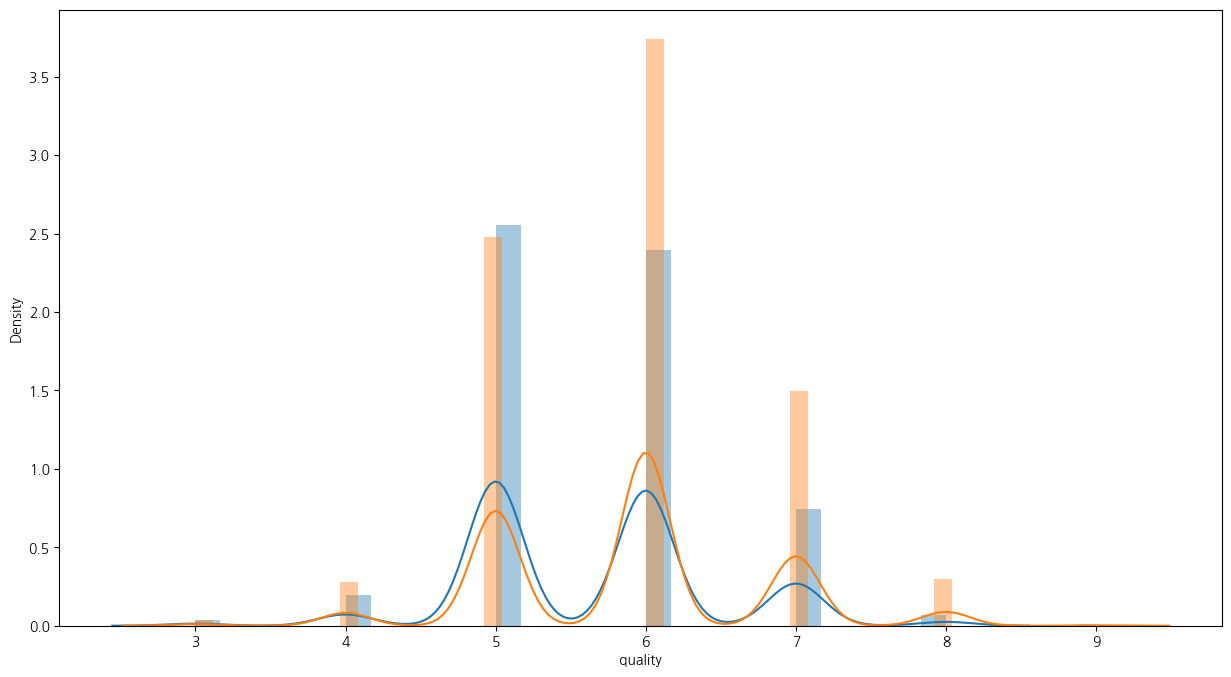

In [24]:
# distplot() --> 데이터 분포도
sns.distplot(red)
sns.distplot(white)

Text(0, 0.5, 'Frequency')

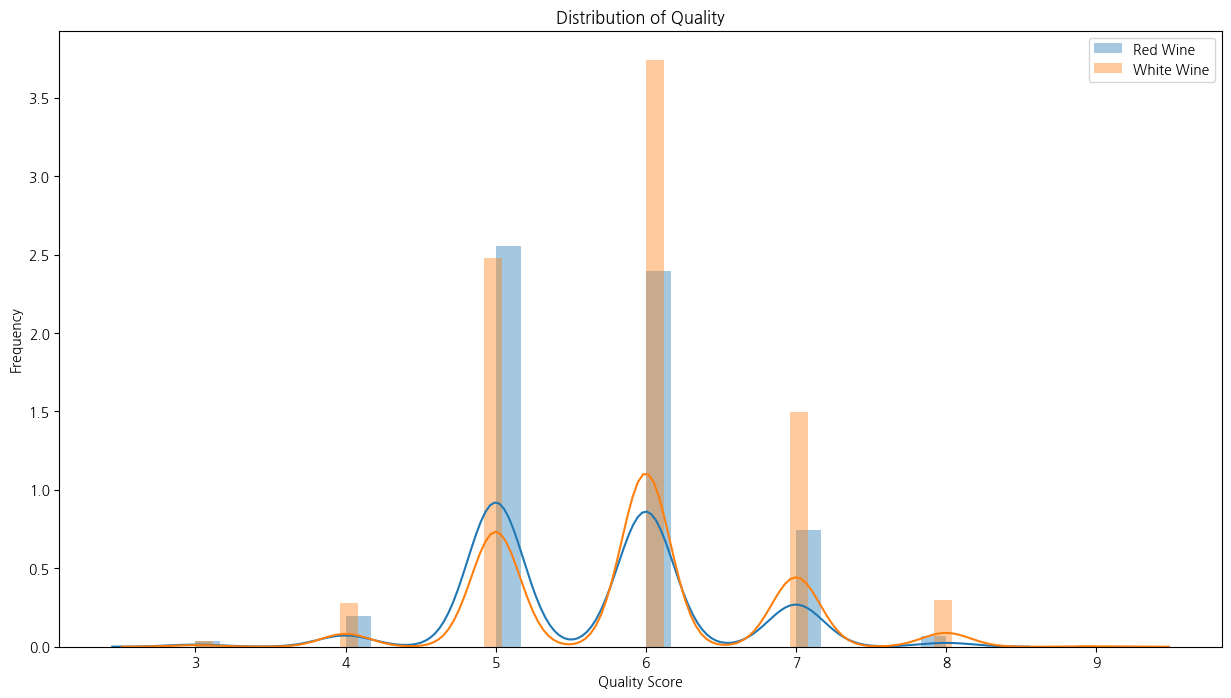

In [25]:
sns.distplot(red,label='Red Wine')
sns.distplot(white, label='White Wine')
plt.legend()
plt.title("Distribution of Quality")
plt.xlabel("Quality Score")
plt.ylabel('Frequency')

- Lesson Learned
- 두 그룹의 와인 모두 품질은 근사적인 정규분포를 따름
- distplot을 그려보면 단순한 기술통계(describe())보다 두 그룹의 분포에 대한 세부 정보를 더 알 수 있음

### T검정
- 와인 종류에 따른 품질의 차이가 통계적으로 유의한지 알기 위해
- 그룹별 품질의 평균과 표준편차를 이용: groupby(), describe(), agg()
- 두 그룹 모두 std 표준편차가 적으면, 합동분산 t검정 실시
- T값, p-value: <0.05 (95%이상 신뢰수준으로 두 그룹의 품질 차이가 통계적으로 유의함)

In [26]:
tstat, pvalue, df = sm.stats.ttest_ind(red, white) # 두 그룹간의 평균값의 차이 검정
print('T값은 %.3f이고 pvalue는 %.5f 자유도는 %d' %(tstat, pvalue, df))

T값은 -9.686이고 pvalue는 0.00000 자유도는 6495


In [27]:
# print('T값은 %.3f이고 pvalue는 %.7f' %(tstat, pvalue))

### 상관관계분석

In [28]:
# correlation, 두 변수간의 관계, 상관계수 --> corr()
# 상관계수는, -1부터 1사이의 값, 0.2이상 값부터 관계가 있다라고 판단, ㅇ.5이상이면 강한 상관관계
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


In [29]:
# 'quality'와 다른 변수들 간의 상관관계만 보고자 힐때.
# correlation = wine.corr()['quality'].sort_values(ascending=False)
correlation = wine.corrwith(wine.quality).sort_values()

# 결과를 출력합니다.
print(correlation)

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64


- 밀도, 결합산, 휘발산, 잔여설탕, 총이산화황 품질과 음의 상관관계, 특히 밀도
- 알코올, 이산화황, 산성도, 구연산은 품질과 양의 상관관계, 특히 알코올

### pairplot(): 변수들의 관계(산점도)
- 모든 샘플에 대해 점을 찍음 6400개? memory error
- 그래서 sampling, red 200개, white 200개 정도씩만 점 찍음

In [30]:
def sampling(data, n=200, replace=False): # replace = False, 비복원추출
    return data.loc[np.random.choice(data.index, size=n, replace = replace)]

In [31]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [32]:
sampling(wine)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
953,10.2,0.340,0.48,2.1,0.052,5.0,9.0,0.99458,3.20,0.69,12.10,7,0
5194,7.2,0.160,0.29,1.0,0.031,40.0,123.0,0.98958,3.12,0.40,12.10,7,1
299,6.9,0.670,0.06,2.1,0.080,8.0,33.0,0.99845,3.68,0.71,9.60,5,0
3923,6.9,0.300,0.21,7.2,0.045,54.0,190.0,0.99595,3.22,0.48,9.40,5,1
386,7.8,0.540,0.26,2.0,0.088,23.0,48.0,0.99810,3.41,0.74,9.20,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,6.2,0.240,0.22,7.9,0.053,45.0,149.0,0.99545,3.23,0.52,9.30,5,1
5421,7.0,0.330,0.28,5.7,0.033,39.0,204.0,0.99176,3.17,0.64,12.50,6,1
811,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.90,6,0
6332,5.2,0.185,0.22,1.0,0.030,47.0,123.0,0.99218,3.55,0.44,10.15,6,1


In [33]:
red_wine = wine.query('type == 0')
white_wine = wine.query('type == 1')
print(red_wine.shape)
print(white_wine.shape)

(1599, 13)
(4898, 13)


In [34]:
red_sample = sampling(red_wine)
white_sample = sampling(white_wine)
print(red_sample.shape)
print(white_sample.shape)

(200, 13)
(200, 13)


In [35]:
wine_sample = pd.concat([red_sample, white_sample], axis=0)

In [36]:
wine_sample

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
521,7.6,0.410,0.49,2.0,0.088,16.0,43.0,0.99800,3.48,0.64,9.1,5,0
1078,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5,0
1331,7.8,0.870,0.26,3.8,0.107,31.0,67.0,0.99668,3.26,0.46,9.2,5,0
87,7.7,0.490,0.26,1.9,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5,0
266,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6269,6.6,0.285,0.49,11.4,0.035,57.0,137.0,0.99732,3.08,0.54,8.9,6,1
4376,7.6,0.200,0.36,1.9,0.043,24.0,111.0,0.99237,3.29,0.54,11.3,6,1
4919,7.5,0.290,0.36,15.7,0.050,29.0,124.0,0.99680,3.06,0.54,10.4,5,1
1700,7.1,0.120,0.32,9.6,0.054,64.0,162.0,0.99620,3.40,0.41,9.4,5,1


> **원본 데이터인 wine에서 wine_sample 샘플링이 된 샘플인지 아닌지 표시** 
>- np.where(조건문, True일 때 값, False일 때 값), excel의 if와 유사

In [37]:
# np.where() --> where(조건, 조건만족했을경우, 그렇지 않을 경우)
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1, 0)
wine.head(30)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,in_sample
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0,0


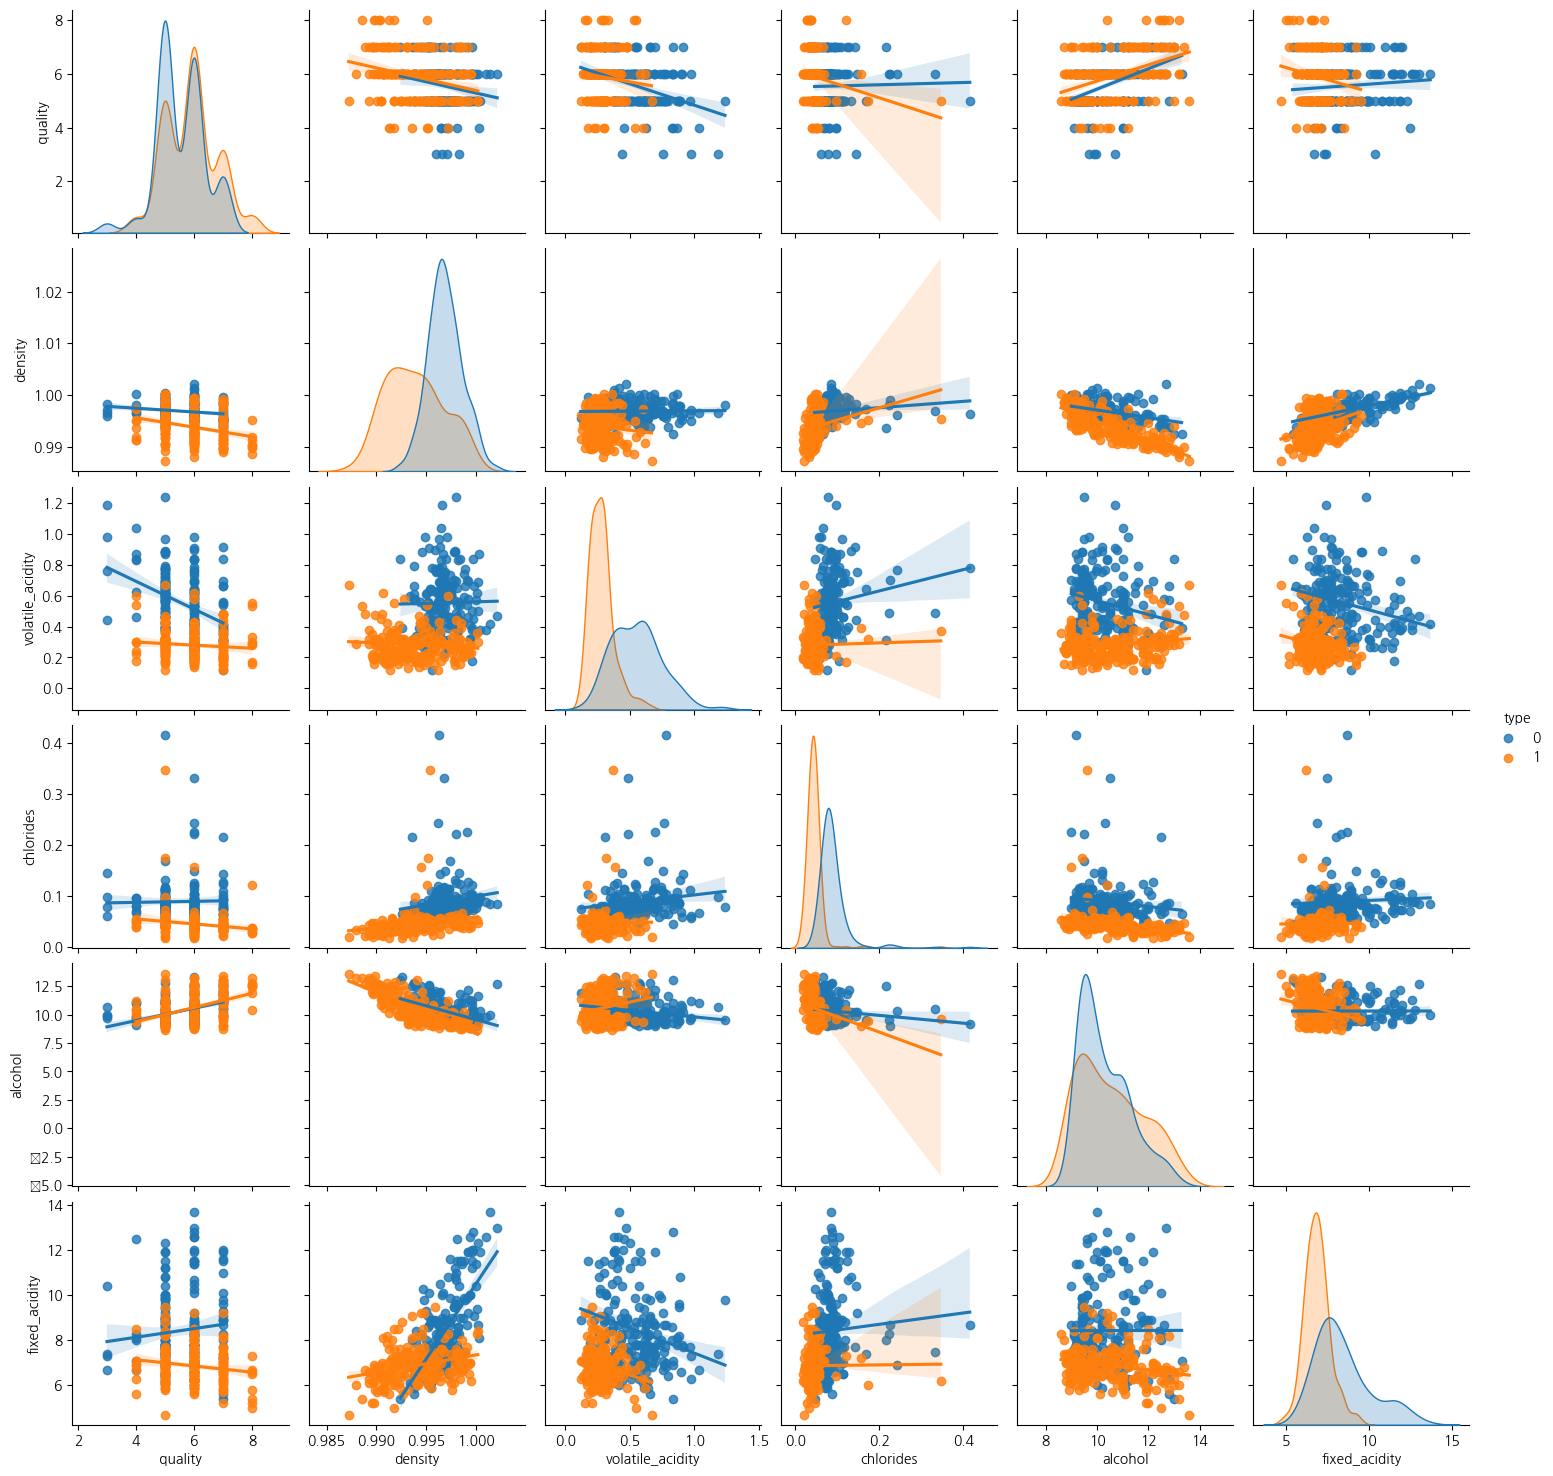

In [38]:
sns.pairplot(data=wine_sample, vars=['quality', 'density', 'volatile_acidity', 'chlorides', 'alcohol', 'fixed_acidity'], kind='reg', hue='type')

### 통계분석- 선형회귀 분석
- 각 독립변수가 종속변수에 미치는 영향을 측정
- 설명 & 예측의 목적

- y = ax1+bx2+cx3 + d
- quality = a* alcohol + b* sugar + c* density +...+d

In [39]:
wine_formula = 'quality ~ density + volatile_acidity + chlorides + alcohol + fixed_acidity'

In [40]:
model = ols(wine_formula, data = wine).fit() # ols() --> ordinary least squares, 최솢[곱법, 최소자승법

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     475.8
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:14:28   Log-Likelihood:                -7323.5
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6491   BIC:                         1.470e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -42.5707      5.293     -8.043      0.000     -52.947     -32.194
density             45.1861      5.268      8.577      0.000      34.858      55.514
volatile_acidity    -1.4777      0.063    -23.372      0.000      -1.602      -1.354
chlorides           -0.0948      0.304     -0.312      0.755      -0.691       0.502
alcohol              0.3925      0.012     33.591      0.000       0.370       0.415
fixed_acidity       -0.0233      0.009     -2.683      0.007      -0.040      -0.006
==============================================================================
Omnibus:                      114.144   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.089
Skew:                           0.004   Prob(JB):                     4.00e-51
Kurtosis:                       3.926   Cond. No.                     1.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,in_sample
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0


- 독립변수들의 측정단위가 저마다 다 달라서 이 같은 문제가 발생(density는 거의 변수들간 차이가 없음)
- 그래서 scaling이 필요
- 이를 표준화라고 함(정규분포를 표준정규분포화하는 것과 동일)
- 측정값에서 평균에서 빼주고 다시 표준편차로 나눔(Z분포화)

#### 독립변수의 표준화

In [43]:
# density + volatile_acidity + chlorides + alcohol + fixed_acidity
X = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
X.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [44]:
X_standard = (X - X.mean()) / X.std()
X_standard.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,-0.915394,0.569914,-2.192664,1.034913,0.142462,-1.100055,1.812950,-0.744721,0.193082,-1.446247,2.188664
1,-0.580023,1.197883,-2.192664,0.701432,0.451001,-0.311296,-0.115064,-0.597594,0.999502,-0.862402,3.281982
2,-0.580023,1.026618,-1.917405,0.768128,0.451001,-0.874695,0.258100,-0.660648,0.797897,-1.092402,2.553104
3,-0.580023,0.541370,1.660957,1.101609,3.073580,-0.762016,-0.363840,-0.744721,0.327485,-0.986248,-0.362411
4,-0.915394,0.569914,-2.192664,1.034913,0.142462,-1.100055,1.812950,-0.744721,0.193082,-1.446247,2.188664


In [45]:
wine_standard = pd.concat([wine.quality, X_standard, wine.type], axis=1)
wine_standard

,quality,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity,type
0,5,-0.915394,0.569914,-2.192664,1.034913,0.142462,-1.100055,1.812950,-0.744721,0.193082,-1.446247,2.188664,0
1,5,-0.580023,1.197883,-2.192664,0.701432,0.451001,-0.311296,-0.115064,-0.597594,0.999502,-0.862402,3.281982,0
2,5,-0.580023,1.026618,-1.917405,0.768128,0.451001,-0.874695,0.258100,-0.660648,0.797897,-1.092402,2.553104,0
3,6,-0.580023,0.541370,1.660957,1.101609,3.073580,-0.762016,-0.363840,-0.744721,0.327485,-0.986248,-0.362411,0
4,5,-0.915394,0.569914,-2.192664,1.034913,0.142462,-1.100055,1.812950,-0.744721,0.193082,-1.446247,2.188664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6,0.593772,-0.486215,-0.197039,-1.186069,-0.783154,-0.367636,0.320294,-0.807775,-0.210128,-0.420095,-0.787590,1
6493,5,-0.747709,-0.257863,0.284664,0.067819,-0.474615,1.491582,-0.426034,0.537383,-0.478935,0.924517,-0.119451,1
6494,6,-0.915394,-0.429127,-0.885185,-0.719196,-0.551750,-0.029596,-1.421138,-0.891847,-0.478935,-0.083942,-0.605370,1
6495,7,1.935253,-0.971463,-0.128224,-2.003097,-1.323097,-0.592996,0.755652,-0.912866,-1.016548,-0.101635,-0.301671,1


In [46]:
model_standard = ols(wine_formula, data=wine_standard).fit()

In [47]:
model_standard.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     475.8
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:14:28   Log-Likelihood:                -7323.5
No. Observations:                6497   AIC:                         1.466e+04
Df Residuals:                    6491   BIC:                         1.470e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.8184      0.009    627.553      0.000       5.800       5.837
density              0.1355      0.016      8.577      0.000       0.105       0.166
volatile_acidity    -0.2433      0.010    -23.372      0.000      -0.264      -0.223
chlorides           -0.0033      0.011     -0.312      0.755      -0.024       0.018
alcohol              0.4682      0.014     33.591      0.000       0.441       0.495
fixed_acidity       -0.0302      0.011     -2.683      0.007      -0.052      -0.008
==============================================================================
Omnibus:                      114.144   Durbin-Watson:                   1.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.089
Skew:                           0.004   Prob(JB):                     4.00e-51
Kurtosis:                       3.926   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### AI 모델 개발
- Regression(회귀분석); 데이터를 이용해 설명과 예측이 가능하지만 설명이 주요 목적
- AI Machine Learning; 대량의 데이터를 이용한 예측이 주요 목적

#### 머신러닝의 학습과정
- 트레인(훈련)데이터와 테스트데이터, 두 종류가 필요
>- 트레인(Train)데이터: 머신이 학습(공부)하기 위한 데이터(문제와 답)
>- 테스트(Test)데이터: 머신이 트레인데이터로 학습한 후 학습을 얼마나 잘 했는지 테스트(시험)하기 위한 데이터(문제)

In [50]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [53]:
# feature 만 있는 데이터 프레임에 타겟 데이터를 추가한다.
X = wine_standard.loc[:, 'alcohol':'type']
X

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity,type
0,-0.915394,0.569914,-2.192664,1.034913,0.142462,-1.100055,1.812950,-0.744721,0.193082,-1.446247,2.188664,0
1,-0.580023,1.197883,-2.192664,0.701432,0.451001,-0.311296,-0.115064,-0.597594,0.999502,-0.862402,3.281982,0
2,-0.580023,1.026618,-1.917405,0.768128,0.451001,-0.874695,0.258100,-0.660648,0.797897,-1.092402,2.553104,0
3,-0.580023,0.541370,1.660957,1.101609,3.073580,-0.762016,-0.363840,-0.744721,0.327485,-0.986248,-0.362411,0
4,-0.915394,0.569914,-2.192664,1.034913,0.142462,-1.100055,1.812950,-0.744721,0.193082,-1.446247,2.188664,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.593772,-0.486215,-0.197039,-1.186069,-0.783154,-0.367636,0.320294,-0.807775,-0.210128,-0.420095,-0.787590,1
6493,-0.747709,-0.257863,0.284664,0.067819,-0.474615,1.491582,-0.426034,0.537383,-0.478935,0.924517,-0.119451,1
6494,-0.915394,-0.429127,-0.885185,-0.719196,-0.551750,-0.029596,-1.421138,-0.891847,-0.478935,-0.083942,-0.605370,1
6495,1.935253,-0.971463,-0.128224,-2.003097,-1.323097,-0.592996,0.755652,-0.912866,-1.016548,-0.101635,-0.301671,1


In [54]:
Y = wine_standard['quality']
Y

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

- train 데이터의 X값들: X_train(머신이 학습할 문제)
- train 데이터의 y값들: y_train(머신이 학습할 문제의 답)
- model.fit(X_train, y_train) → 트레인데이터로 학습(공부)하라는 명령어
- test 데이터 X값들: X_test(머신이 답을 맞춰야 할 문제)
- test 데이터 y값들: y_test(머신이 X_test데이터로 예측한 값을 비교해 볼 정답)

In [56]:
# 전체 데이터에서 X, y를 나눔
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [58]:
# DecisionTreeClassifier 객체를 행성한다. 생성된 DecisionTreeClassifier 객체의 fit() 을 이용해서 학습용 데이터의 feature 데이터, target 데이터를 이용하여서 학습을 수행한다.
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
predict = dtc.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict))

0.5835897435897436


- Model 학습

In [57]:
model.fit(X_train, y_train)

AttributeError: 'OLSResults' object has no attribute 'fit'

- 예측

- 평가

#### 다음 단계의 내용은?
- R^2 값을 높일 수 있는 독립변수들을 발굴해서 분석에 추가